
Тестовое задание на позицию Аналитика от Чебанова Федора (тг TODUR8)


Оглавление во вкладке OUTLINE

In [157]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import duckdb

# Задание 1

Какие выводы можно сделать после анализа таблицы? В каком направлении стоит работать для повышения CTR всей системы?
Все выводы должны быть написаны текстом невзирая на их «очевидность».
Цель: оценить ваши способности излагать логику и мысли в письменном виде.
Так же будет большим плюсом визуализация выводов на графиках.

In [158]:
# загрузка данных
df_push = pd.read_csv('Статистика Push.csv', thousands=' ')

In [159]:
display(f'Размер датасета: {df_push.shape}')
df_push = df_push.drop('Unnamed: 0', axis=1)
df_push.head(3)

'Размер датасета: (168, 6)'

,Type,Sent,Hits,CTR,channel
0,1,272048,9679,3.56%,VK
1,2,1068417,91426,8.56%,VK
2,3,33265,1015,3.05%,VK


Описание данных:

* Type - Тип пуш-уведомления
* Sent - Количество отправленных уведомлений
* Hits – Количество пользователей, перешли по уведомлению
* CTR (Click-Through Rate) – Кликабельность уведомлений 
* channel - 
VK – ВКонтакте, 
MM –  Мой Мир,
OK – Одноклассники, 
FB_RU – Фейсбук Россия, 
FB_EN – Фейсбук иностранный ,
FS – Фотострана

In [160]:
# посмотрим тип данных
df_push.dtypes

Type        int64
Sent        int64
Hits        int64
CTR        object
channel    object
dtype: object

In [161]:
# проверим наличие пропусков
df_push.isna().sum()

Type       0
Sent       0
Hits       0
CTR        0
channel    0
dtype: int64

In [162]:
# удаляем знак '%' пробелы в цифрах
df_push['CTR'] = df_push['CTR'].str.replace('%', '', regex=False) 

# Преобразуем колонки CTR, Sent, Hits в число (float) 
df_push['CTR'] = pd.to_numeric(df_push['CTR'])  


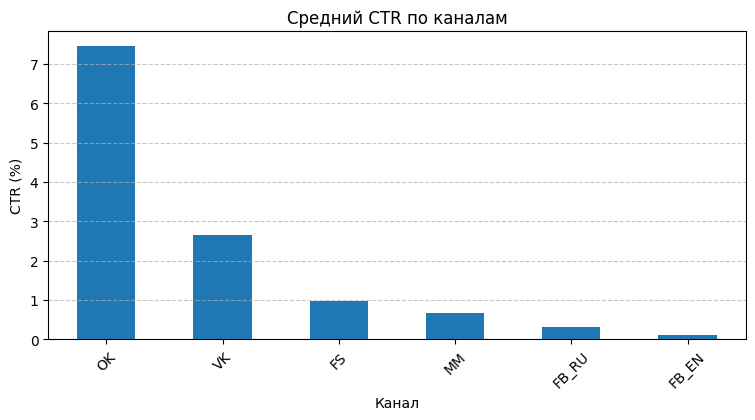

In [163]:
# сгруппируем CTR по каналу
ctr_by_channel = df_push.groupby("channel")["CTR"].mean().sort_values(ascending=False)


plt.figure(figsize=(9, 4))
ctr_by_channel.plot(kind='bar', title="Средний CTR по каналам", ylabel="CTR (%)",
                     xlabel="Канал")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Каналы OK и VK демонстрируют наивысший уровень CTR по сравнению с остальными. Это может свидетельствовать о более релевантном контенте для аудитории

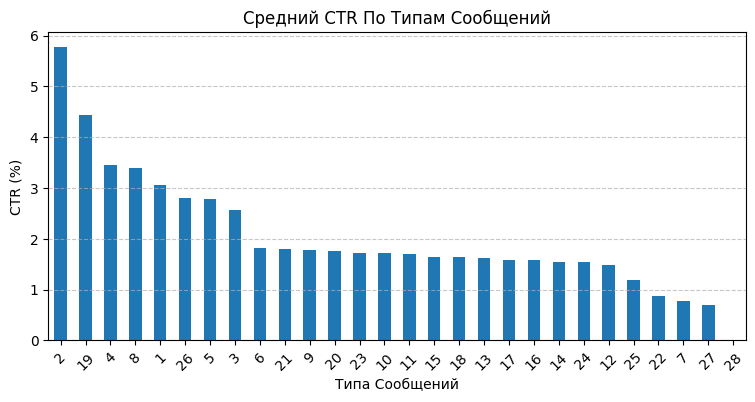

In [164]:
# сгруппируем CTR по типу
ctr_by_type = df_push.groupby("Type")["CTR"].mean().sort_values(ascending=False)

plt.figure(figsize=(9, 4))
ctr_by_type.plot(kind='bar', title="Средний CTR По Типам Сообщений", ylabel="CTR (%)", xlabel="Типа Сообщений")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

У типов уведомлений 2, 19, 4, 8, 26 наиболее высокий CTR. Скорее всего, эти типы представляют контент, который наиболее ценен и интересен пользователям.

<Figure size 1200x600 with 0 Axes>

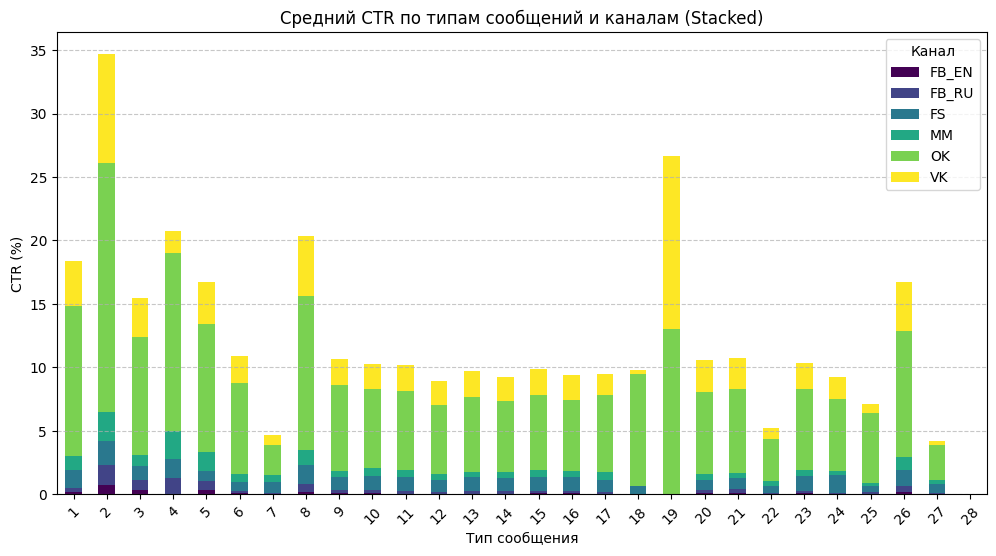

In [165]:
# сгруппируем CTR по типу и по каналу
df_pivot = df_push.pivot_table(index="Type", columns="channel", values="CTR", aggfunc="mean")


plt.figure(figsize=(12, 6))
df_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12, 6))


plt.title("Средний CTR по типам сообщений и каналам (Stacked)")
plt.xlabel("Тип сообщения")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)
plt.legend(title="Канал")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Видно, что даже в рамках одного типа уведомления CTR по разным каналам существенно отличается. Это значит, что эффективность во многом зависит не только от темы или содержания уведомления, но и от того, где (в каком канале) пользователь получает сообщение.


Я построил интерактивный дашборд в Power BI для гибкой фильтрации.

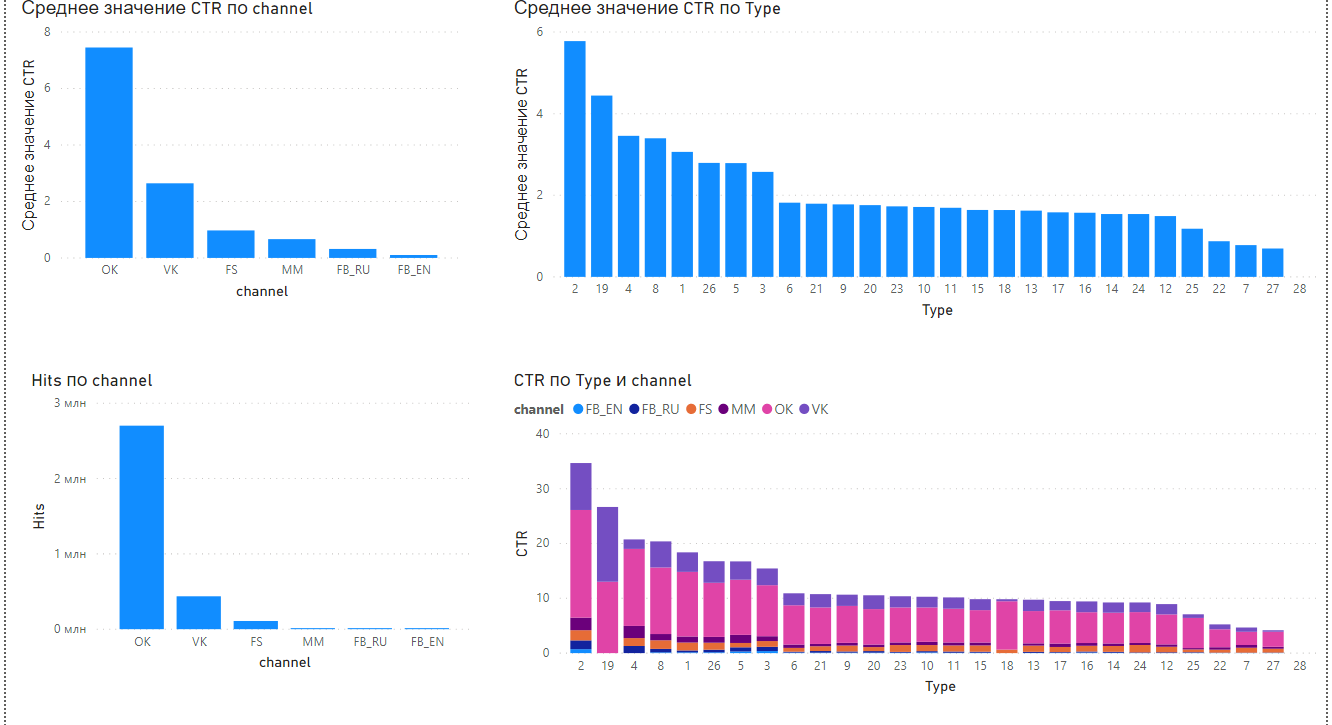


Общий вывод:

Максимальный вклад в общий рост CTR даёт сочетание эффективных типов уведомлений (2, 19, 4 и т.д.) с каналами OK и VK, поскольку именно там наблюдаются самые высокие показатели.

Рекомендации для повышения общего уровня CTR всей системы:
- Усилить высокоэффективные каналы и типы уведомлений.

# Задание 2

Какие выводы вы можете сделать по работе туториала? Укажите направления, где его можно улучшить? (если посчитаете таковые нужными). 

In [166]:
file_path = 'Данные по туториалу для Тестового задания для аналитика.xlsx'

# данные Приложение Android
sheet_name = "Прохождение туториала Android В"  
df_android = pd.read_excel(file_path, sheet_name=sheet_name)

# данные Приложение Direct
sheet_name = "Прохождение туториала Direct OK"  
df_direct = pd.read_excel(file_path, sheet_name=sheet_name)

In [167]:
display(f'Размер датасета: {df_android.shape}')
display(df_android.head(2))

'Размер датасета: (998, 8)'

,ID игрока,Платформа,Туториал: Начало,Туториал: Шаг 1,Туториал: Шаг 2,Туториал: Шаг 3,Туториал: Шаг 4,Туториал: Шаг 5
0,46837070,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5
1,46837225,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5


In [168]:
display(f'Размер датасета: {df_direct.shape}')
display(df_direct.head(2))

'Размер датасета: (1992, 8)'

,ID игрока,Платформа,Туториал: Начало,Туториал: Шаг 1,Туториал: Шаг 2,Туториал: Шаг 3,Туториал: Шаг 4,Туториал: Шаг 5
0,46409470,Direct OK,Шаг 0,NaN,NaN,NaN,NaN,NaN
1,46409474,Direct OK,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,NaN


Описание данных:

* Шаг  - Действие
* Туториал: Начало - Загрузка туториала
* Туториал: Шаг 1 - Крути бутылочку
* Туториал: Шаг 2 - Да / Нет
* Туториал: Шаг 3 - Получи подарок
* Туториал: Шаг 4 - Перейди в профиль и сделай подарок
* Туториал: Шаг 5 - Конец, заполни профиль


In [169]:
def users_churn(df):
    '''
    функция на вход получает датасет
    возвращает новый датасет с показателями активности пользователей по шагам 
    '''
    # Шаги, по которым нужно посчитать количество непустых значений
    step_cols = [
    "Туториал: Начало", "Туториал: Шаг 1", "Туториал: Шаг 2",
    "Туториал: Шаг 3", "Туториал: Шаг 4", "Туториал: Шаг 5"
    ]

    # Считаем количество непустых (notna) значений в каждом столбце
    counts = df[step_cols].notna().sum()

    # Преобразуем в DataFrame для удобного отображения
    counts_android = counts.reset_index()
    counts_android.columns = ["Шаг", "users"]

    df = counts_android
    # Получаем значение из первой строки
    first_value = df['users'].iloc[0]

    # Создаём новый столбец, где каждое значение — это (текущее / первое) * 100
    df['users_%'] = df['users'] / first_value * 100

    # При желании округлите до нужного числа знаков, например, до 1 знака после запят
    df['users_%'] = df['users_%'].round(1)

    # Разница: (число пользователей на предыдущем шаге) - (число на текущем)
    df['churn_%'] = df['users_%'].shift(1) - df['users_%']

    # Вместо df['users'].shift(1) используем shift(-1)
    df['churn_%'] = df['users_%'] - df['users_%'].shift(-1)

    # Разница: (число пользователей на предыдущем шаге) - (число на текущем)
    df['users_churn'] = df['users'].shift(1) - df['users']

    # Вместо df['users'].shift(1) используем shift(-1)
    df['users_churn'] = df['users'] - df['users'].shift(-1)
    return df

In [170]:
# применить функцию 
counts_android = users_churn(df_android)
counts_android.head()

,Шаг,users,users_%,churn_%,users_churn
0,Туториал: Начало,995,100.0,2.7,27.0
1,Туториал: Шаг 1,968,97.3,1.1,11.0
2,Туториал: Шаг 2,957,96.2,0.2,2.0
3,Туториал: Шаг 3,955,96.0,1.6,16.0
4,Туториал: Шаг 4,939,94.4,1.1,11.0


In [171]:
# применить функцию 
counts_direct = users_churn(df_direct)
counts_direct.head()

,Шаг,users,users_%,churn_%,users_churn
0,Туториал: Начало,1873,100.0,29.0,544.0
1,Туториал: Шаг 1,1329,71.0,7.0,130.0
2,Туториал: Шаг 2,1199,64.0,1.1,20.0
3,Туториал: Шаг 3,1179,62.9,5.1,96.0
4,Туториал: Шаг 4,1083,57.8,5.0,94.0


In [172]:
# экспорт в excel  для power bi
counts_android.to_excel('counts_android.xlsx')
counts_direct.to_excel('counts_direct.xlsx')

Я построил матрицы прохождения туториала в Power BI(на основе обработаных выше данных).

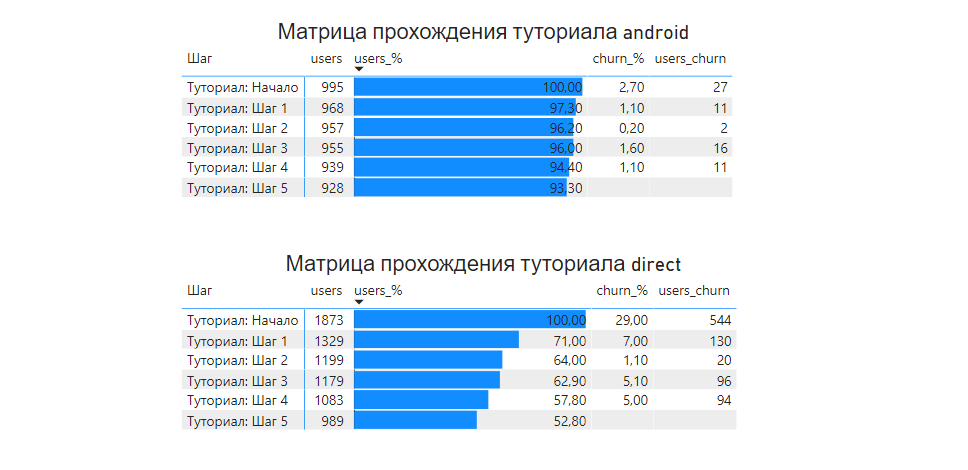

Общий вывод:

Анализ двух матриц прохождения демонстрирует, что:

* Android-аудитория показывает почти образцовый уровень удержания в процессе туториала (суммарный churn ~7%), что говорит о продуманном UX решениях и высокой мотивации пользователей завершать обучение.

* Direct-аудитория, напротив, теряет почти половину своих пользователей к концу туториала; особенно остро проблема проявляется на первом шаге (29% оттока), что указывает на недостаточную мотивации пользователей завершать обучение.


Рекомендации:

* Основные направления улучшения связаны с устранением «болезненных точек» на начальном этапе(шаг 1) и в середине пути (шаги 3 и 4) для канала direct. Это позволит увеличить общий процент завершения туториала и повысить конверсию в целевые действия уже после обучения.

* При сохранении текущей успешной стратегии для Android можно масштабировать лучшие практики (дизайн, подача информации, последовательность шагов) на direct‐сегмент. 

# Задание 3

Определите, есть ли у проекта проблема с «доступностью сервиса» (и стоит ли тратить ресурсы на её устранение) и как «доступность сервиса» изменялась со временем (после обновлений, которые были произведены в анализируемый период).
Загрузка считается неудачной если есть запись в таблице loads, но нет в таблице sessions. При 100% удачных загрузок на каждую запись в loads должна быть ровно 1 запись в sessions следующая за ней по времени.

In [173]:
# загрузка данных
loads = pd.read_csv('loads.csv')
sessions = pd.read_csv('sessions.csv')

In [174]:
display(f'Размер датасета: {loads.shape}')
loads.head(3)

'Размер датасета: (2111863, 4)'

,net_id,net_type,ip,time
0,104080122499,4,3165257117,2018-09-30 15:00:01
1,922013949867,4,3579284306,2018-09-30 15:00:02
2,899787342069,4,1602978652,2018-09-30 15:00:06


Описание данных:

* net_id - id устройства (234434 уникальных значений)

* net_type - тип сети (принимает значениния 4/0/30/5 кол. соответственно
 1014332/645001/274786/177744)

* ip - IP-адрес (349921 уникальных значений)

* time - когда произошло событие

In [175]:
# посмотрим тип данных
loads.dtypes

net_id       int64
net_type     int64
ip           int64
time        object
dtype: object

In [176]:
# проверим наличие пропусков
loads.isna().sum()

net_id      0
net_type    0
ip          0
time        0
dtype: int64

In [177]:
display(f'Размер датасета: {sessions.shape}')
sessions.head(3)

'Размер датасета: (2027986, 3)'

,player_id,login_time,ip
0,40869717,1538341219,3165278651
1,41743197,1538341210,3579284306
2,41758875,1538341202,1351700987


Описание данных:

* player_id - id игрока (187192 уникальных значений)

* login_time - время входа в систему

* ip - IP-адрес (324200 уникальных значений)

In [178]:
# посмотрим тип данных
sessions.dtypes

player_id     int64
login_time    int64
ip            int64
dtype: object

In [179]:
# проверим наличие пропусков
sessions.isna().sum()

player_id     0
login_time    0
ip            0
dtype: int64

In [180]:
# поменять тип данных на datetime64
loads['time'] = pd.to_datetime(loads['time'])
sessions['login_time'] = pd.to_datetime(sessions['login_time'], unit='s') \
                        .dt.strftime('%Y-%m-%d %H:%M:%S')

sessions['login_time'] = pd.to_datetime(sessions['login_time'])

In [181]:
# добавить новую колонку с меткой loads
df_loads = loads.copy()
df_loads['stage'] = 'loads'

# переименовать колонку 
df_sessions = sessions[['login_time', 'ip']].copy()
df_sessions = df_sessions.rename(columns={'login_time': 'time'})

# добавить новую колонку с меткой sessions
df_sessions['stage'] = 'sessions'


In [182]:
# соеденим датасеты 
df_all = pd.concat([df_loads, df_sessions], axis=0)

In [183]:
# отсортировать по пользователю и времени
df_all = df_all.sort_values(['ip', 'time']).reset_index(drop=True)

# создать сдвинутые столбцы, чтобы смотреть на следующее 
# и следующее за ним действие того же user
df_all['next_action'] = df_all.groupby('ip')['stage'].shift(-1)
df_all['next2_action'] = df_all.groupby('ip')['stage'].shift(-2)

# по умолчанию считаем, что загрузка "неудачная"
df_all['result'] = 0

# Условие «ровно одно 'sessions' после 'loads'» означает:
#   - Текущая строка: action == 'loads'
#   - Следующая строка (next_action): 'sessions'
#   - Строка после следующей (next2_action): != 'sessions' 
# (чтобы не было второго 'sessions' подряд)
mask = (
    (df_all['stage'] == 'loads') &
    (df_all['next_action'] == 'sessions') &
    (df_all['next2_action'] != 'sessions')
)

df_all.loc[mask, 'result'] = 1

# убрать вспомогательные столбцы
df_all.drop(columns=['next_action', 'next2_action'], inplace=True)


In [184]:
# отберем нужные колонки и события из таблицы loads
loads_result = df_all[df_all['stage'] == 'loads']
loads_result = loads_result[['ip', 'time', 'result', 'net_id', 'net_type']]

# добавить колонку date для группировки по дням
loads_result['date'] = loads_result['time'].dt.date

In [185]:
loads_result.head(3)

,ip,time,result,net_id,net_type,date
0,17480745,2018-10-17 02:14:35,0,8.284412e+07,30.0,2018-10-17
1,17480745,2018-10-17 02:15:49,0,2.029386e+11,4.0,2018-10-17
2,17480745,2018-10-17 02:17:30,0,1.382360e+08,0.0,2018-10-17


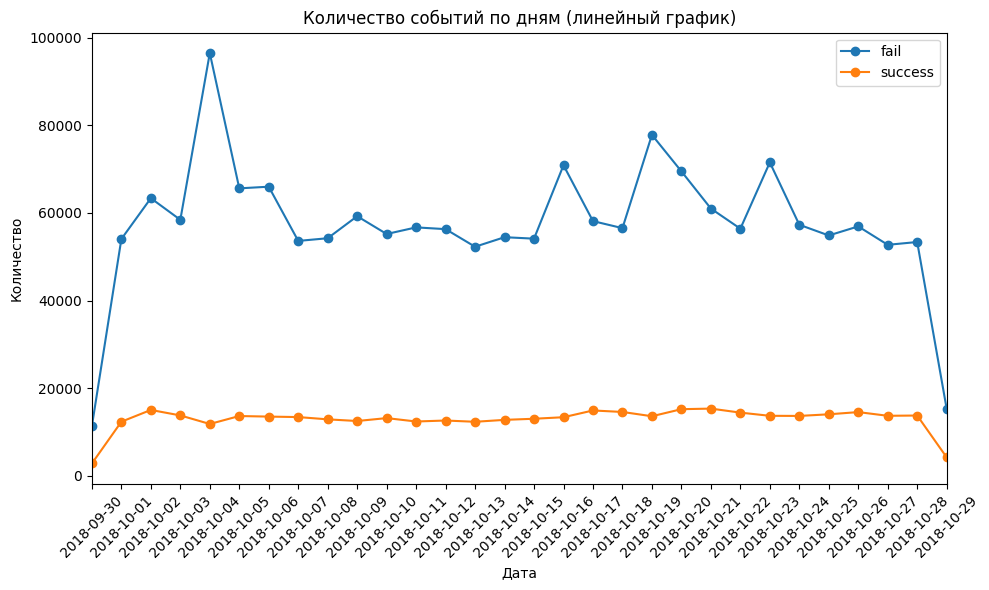

In [186]:
#Группируем по дате и по result, считаем количество
df_grouped = (loads_result.groupby(['date', 'result']).size()
          .reset_index(name='count')
)

# «Разворачиваем» данные так, чтобы по каждой дате были столбцы для 0 и 1
df_pivot = df_grouped.pivot(index='date', columns='result', values='count').fillna(0)

# Переименуем колонки
df_pivot.columns = ['fail', 'success']  # 0 -> fail, 1 -> success

# -------------------------------
# Дополнительные шаги, чтобы на оси X были ВСЕ дни от минимальной до максимальной:
# 1) Превратим индекс из типа date в полноценный DatetimeIndex
df_pivot.index = pd.to_datetime(df_pivot.index)

# 2) Реиндексируем на полный диапазон дат
all_days = pd.date_range(df_pivot.index.min(), df_pivot.index.max(), freq='D')
df_pivot = df_pivot.reindex(all_days, fill_value=0)
df_pivot.index.name = 'date'
# -------------------------------

# Строим линейный график
ax = df_pivot.plot(kind='line', marker='o', figsize=(10, 6))

# Настраиваем ось X, чтобы показывать каждую дату
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))        # интервал в 1 день
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))   # формат дат

plt.title('Количество событий по дням (линейный график)')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [187]:
loads_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111863 entries, 0 to 4139848
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   ip        int64         
 1   time      datetime64[ns]
 2   result    int64         
 3   net_id    float64       
 4   net_type  float64       
 5   date      object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 112.8+ MB


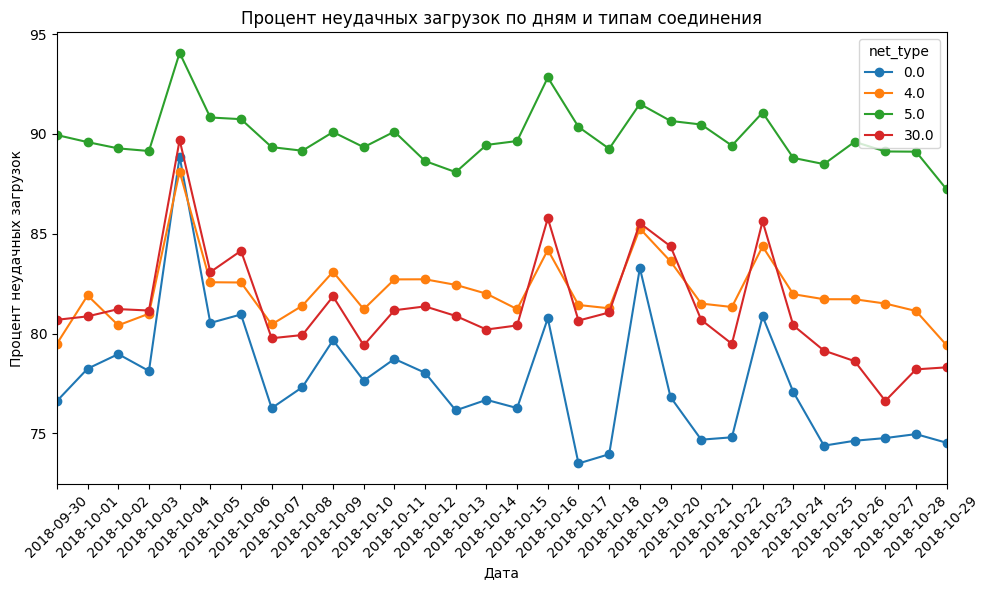

In [188]:
# создаём признак неудачного события: 1, если result = 0
loads_result['fail'] = (loads_result['result'] == 0).astype(int)

# Группируем по дате и net_type, считаем долю неудач (mean() по fail)
df_grouped = (
    loads_result.groupby(['date', 'net_type'])['fail']
      .mean()
      .reset_index(name='fail_rate')
)

# «Разворачиваем» таблицу (pivot), чтобы index = date, columns = net_type, values = fail_rate
df_pivot = df_grouped.pivot(index='date', columns='net_type', values='fail_rate')

# Заполняем пропуски нулями
df_pivot = df_pivot.fillna(0)

# Преобразуем долю (0..1) в проценты
df_pivot = df_pivot * 100

# -----------------------------
# ДОБАВЛЯЕМ ВСЕ ДНИ В ДИАПАЗОНЕ
# -----------------------------
# Убеждаемся, что индекс — это DatetimeIndex
df_pivot.index = pd.to_datetime(df_pivot.index)

# Создаём полный список дней от минимальной до максимальной даты
all_days = pd.date_range(df_pivot.index.min(), df_pivot.index.max(), freq='D')

# Реиндексируем, добавляя пропущенные даты и заполняя их нулями
df_pivot = df_pivot.reindex(all_days, fill_value=0)

# Переименуем индекс обратно в 'date', если нужно
df_pivot.index.name = 'date'

# Строим линейный график
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind='line', marker='o', ax=ax)

ax.set_title('Процент неудачных загрузок по дням и типам соединения')
ax.set_xlabel('Дата')
ax.set_ylabel('Процент неудачных загрузок')
ax.legend(title='net_type')

# Настраиваем ось X, чтобы показывать каждую дату
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))             # метка для каждого дня
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))        # формат даты

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Общий вывод:

Результат получился крайне странным!!! Попробую описать то что получилось.

* Данные однозначно показывают, что сервис сталкивается с повышенным уровнем неудачных загрузок (порядка 80–90% в ряде сегментов). Это критически высокое значение, указывающее на значимую проблему с доступностью, особенно для отдельных типов сетевых соединений.

* Колебания в динамике неудачных загрузок. Наблюдаются пики (напр. 2018‑10‑02) и провалы возможно это связанно с обновлениями сервиса.

Рекомендации:
* Провести технический аудит причин неудачных загрузок. Проверить логи и метрики на стороне сервера и клиента в периоды резких скачков.

# Задание 3(скрипт на postgresql)

так как в задании SQL (приоритетнее) я решил продублировать свое решение на SQL. Скрипт преобразовывает данные для визуализации. 

In [189]:
# Загружаем CSV-файлы
loads = pd.read_csv('loads.csv')
sessions = pd.read_csv('sessions.csv')

# SQL-запрос
query = """
WITH loads_transformed AS (
    SELECT 
        ip,
        time::TIMESTAMP AS time,
        'loads' AS stage,
        net_id,
        net_type
    FROM loads
),
sessions_transformed AS (
    SELECT 
        ip,
        TO_TIMESTAMP(login_time) AS time,
        'sessions' AS stage,
        NULL AS net_id,  -- Добавляем отсутствующие колонки
        NULL AS net_type
    FROM sessions
),
combined AS (
    SELECT * FROM loads_transformed
    UNION ALL
    SELECT * FROM sessions_transformed
),
sorted_data AS (
    SELECT 
        ip,
        time,
        stage,
        net_id,
        net_type,
        LEAD(stage, 1) OVER (PARTITION BY ip ORDER BY time) AS next_action,
        LEAD(stage, 2) OVER (PARTITION BY ip ORDER BY time) AS next2_action
    FROM combined
),
final_result AS (
    SELECT 
        ip,
        time,
        net_id,
        net_type,
        CASE 
            WHEN stage = 'loads' AND next_action = 'sessions' AND next2_action <> 'sessions' THEN 1
            ELSE 0
        END AS result
    FROM sorted_data
    WHERE stage = 'loads'
)
SELECT 
    ip, 
    time, 
    result, 
    net_id, 
    net_type, 
    time::DATE AS date
FROM final_result;
"""

# Выполняем SQL-запрос в DuckDB и передаем DataFrame как таблицы
result = duckdb.execute(query).df()

In [190]:
result.head(3)

,ip,time,result,net_id,net_type,date
0,774771179,2018-10-19 16:20:28+02:00,0,924890226752,4,2018-10-19
1,774771179,2018-10-19 18:01:47+02:00,0,924890226752,4,2018-10-19
2,774771179,2018-10-20 00:05:17+02:00,0,924890226752,4,2018-10-20
